Mini Project # 6 Due: Nov. 19/2025
JAMES LEVI 
FLORIDA ATLANTIC UNIVERSITY


Consider the water tank system shown in the following figure. The tank has an input, a water
tap, which can add water to the tank and increase the water level. Water level is measured by a
level sensor

<img src="water.png" alt="Water Tank System" style="width:400px; height:auto;">


## **Kalman Filter Equations**

The goal is to use Kalman filter to estimate the level of the water in the tank using the noisy
measurements coming from the level sensor. Assume that the dynamics and the measurements
are modeled by the following equations:

$$x(n+1) = A x(n) + B u(n) + \varepsilon_p$$

$$y(n) = C x(n) + \varepsilon_m$$

Here, ( u(n) ) is the input to the system. In Kalman estimation we have:

$$K(n) = P_{n|n-1} C^T \left( C P_{n|n-1} C^T + R \right)^{-1}$$

$$x_{n|n} = x_{n|n-1} + K(n)\left( y(n) - C x_{n|n-1} \right)$$

$$P_{n|n} = \left( I - K(n) C \right) P_{n|n-1}$$

$$x_{n+1|n} = A x_{n|n} + B u(n+1)$$

$$P_{n+1|n} = A P_{n|n} A^T + Q$$

Here ( Q ) and ( R ) are the covariance matrices of the process and measurement noises.


#1Assume that the tap is not adding any water to the tank and the level of the water is 1.0.
Also assume that 𝑥(𝑛) is the level of the water in the tank at time 𝑛.


a. The system is static. What are 𝐴 and 𝑢(𝑛)?

<span style="color: blue;">

When it's static, the level of the water is constant and currently not changing. This means that x(n+1) = x(n) and x(n+1)= Ax(n) + B u (n). So A must be equal to 1 and u(n) must be equal to 0



</span>

b. We have only one sensor directly measuring the water level. What is 𝐶 ?

<span style="color: blue;">


</span>

<span style="color: blue;">
since

$${y(n) = x(n) + \varepsilon_p}$$

<br>
and
<br>

$${y(n) = Cx(n) + \varepsilon_m}$$
<br>
so

$${C = 1}$$

</span>

c. At the beginning, before making any measurement, we have no idea about the water level in the tank. So, we assume that

$$x_{0|0} = 0.0.$$

We also have no confidence in this initial point. So, let us assume that

$$P_{0|0} = 1000.0,$$

a big number. Since our state variable (water level) and the measurement (water level) are both scalars, the noise covariance matrices are scalars:

$$Q = q,\qquad R = r.$$

We are confident that we are not adding water to the tank, so let us assume

$$q = 0.0001.$$

But the sensor is very noisy:

$$r = 0.1.$$

We make the first measurement and the number we read is

$$y(1) = 0.9.$$

Use the Kalman filter to find the best first estimation of the water level using the result of this measurement.


In [13]:
A = 1
C = 1
Q = 0.0001   # the noise variance
R = 0.1      # measurement noise variance

x_0_0 = 0.0      # initial estimate
P_0_0 = 1000.0   # initial uncertainty

y1 = 0.9         # first measurement

# prediction step
x_1_0 = A * x_0_0
P_1_0 = A * P_0_0 * A + Q


K1 = (P_1_0 * C) / (C * P_1_0 * C + R) # kalman gain


x_1_1 = x_1_0 + K1 * (y1 - C * x_1_0)# update step

P_1_1 = (1 - K1 * C) * P_1_0

print("Predicted x_1|0 =", x_1_0)
print("Predicted P_1|0 =", P_1_0)

print("Kalman Gain K1 =", K1)

print("Updated x_1|1 =", x_1_1)
print("Updated P_1|1 =", P_1_1)


Predicted x_1|0 = 0.0
Predicted P_1|0 = 1000.0001
Kalman Gain K1 = 0.9999000100089981
Updated x_1|1 = 0.8999100090080983
Updated P_1|1 = 0.09999000100091329


1d. Use maximum likelihood to estimate the water level and its covariance for one measurement, then compare with Kalman. Also check what happens when 
𝑃
0
∣
0
P
0∣0
	​

 becomes larger (for example 10000).

In [ ]:
# maximum likelihood and comparing with kalman

y1 = 0.9
r = 0.1

# ML estimate is actually just the measurement
ml_est = y1
ml_var = r

print("ml_est =", ml_est)
print("ml_var =", ml_var)

# now check kalman numbers when we change initial P

A = 1
C = 1
Q = 0.0001

def first_update(Pstart):
 x0 = 0
 P0 = Pstart

 xp = A * x0
 Pp = A * P0 * A + Q

 K = Pp * C / (C * Pp * C + r)

 xnew = xp + K * (y1 - C * xp)
 Pnew = (1 - K * C) * Pp

 return xnew, Pnew
    

print("kalman P=1000", first_update(1000))
print("kalman P=10000", first_update(10000))


ml_est = 0.9
ml_var = 0.1
kalman P=1000 (0.8999100090080983, 0.09999000100091329)
kalman P=10000 (0.8999910000900891, 0.09999900001024342)


1e. Now assume that we have made one measurement after another for a total of 10
measurements. The outcomes of these measurements are: 𝑦(1) = 0.9, 𝑦(2) =
0.8, 𝑦(3) = 1.1, 𝑦(4) = 1.0, 𝑦(5) = 0.95, 𝑦(6) = 1.05, 𝑦(7) = 1.2, 𝑦(8) =
0.9, 𝑦(9) = 0.85, 𝑦(10) = 1.15. Use Kalman filter iterations to update your
estimation of the water level and the corresponding variance after each
measurement. Plot the true value of the water level, all measurements, and the
Kalman estimations as a function of the iteration number in one graph.
Measurements are made once every second. How many seconds does it take for the
estimations to be within the 5% range of the accurate level? Notice that the
measurements are about 20% above or below the actual level. 

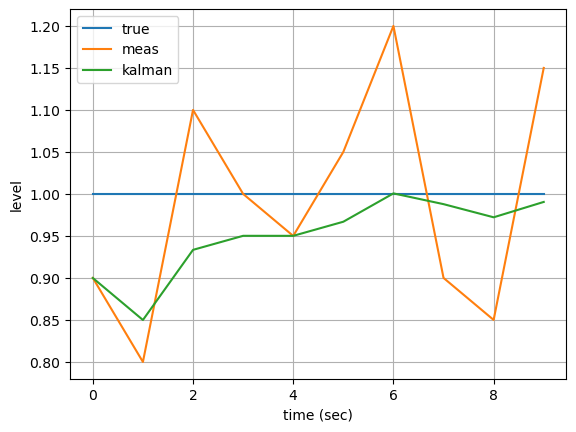

first time kalman is within 5 percent = 4 seconds


In [ ]:
# kalman over 10 measurements

import matplotlib.pyplot as plt

A = 1
C = 1
Q = 0.0001
R = 0.1

x0 = 0.0
P0 = 1000.0

measurements = [0.9, 0.8, 1.1, 1.0, 0.95, 1.05, 1.2, 0.9, 0.85, 1.15]

true_level = 1.0   # constant level

# lists for plotting
estimates = []
meas_list = []
true_list = []

x_cur = x0
P_cur = P0

for k in range(10):

    # prediction
    xp = A * x_cur
    Pp = A * P_cur * A + Q

    # K
    K = Pp * C / (C * Pp * C + R)

    # update with y(k)
    yk = measurements[k]
    x_new = xp + K * (yk - C * xp)
    P_new = (1 - K * C) * Pp

    # store
    estimates.append(x_new)
    meas_list.append(yk)
    true_list.append(true_level)

    # prepare for next
    x_cur = x_new
    P_cur = P_new


# plotting
plt.plot(true_list, label="true")
plt.plot(meas_list, label="meas")
plt.plot(estimates, label="kalman")
plt.legend()
plt.xlabel("time (sec)")
plt.ylabel("level")
plt.grid()
plt.show()


# check when within 5%
within = None
for i in range(len(estimates)):
    err = abs(estimates[i] - true_level)
    if err <= 0.05:   # 5 percent of 1.0 is 0.05
        within = i+1
        break

print("first time kalman is within 5 percent =", within, "seconds")


<span style="color: blue;">
We can see how it takes about 4 seconds (4 units in the x direction) for the Kalman estimate to be within 5 percent of the true water level. This is interesting because this occurs even though individual measurements can be off by about 20 percent.
</span>


2. Now assume that someone opens the tap to add water to the tank without telling us. At the
beginning the tank is empty, 𝑥(0) = 0.0, but the level goes up by 0.1 unit per second.
However, we still assume that the system is static. 

2a. As before, we initialize the iteration with

$$x_{0|0} = 0,\qquad r = 0.1,\qquad q = 0.0001.$$

We use the Kalman estimation filter to update our estimations based on the recorded measurements. This time the measurements are

$$
\begin{aligned}
y(1) &= 0.11,\quad y(2) = 0.29,\quad y(3) = 0.32,\quad y(4) = 0.50,\quad y(5) = 0.58,\
y(6) &= 0.54,\quad y(7) = 0.63,\quad y(8) = 0.64,\quad y(9) = 0.78,\quad y(10) = 1.1,\
y(11) &= 0.95,\quad y(12) = 1.4,\quad y(13) = 1.4,\quad y(14) = 1.6,\quad y(15) = 1.42.
\end{aligned}
$$

Actual water level changes as

$$x(0) = 0.0,; x(1) = 0.1,; x(2) = 0.2,; \ldots,; x(15) = 1.5.$$

Use the Kalman filter to estimate the level of water using these measurements and the model you have in mind for the dynamics of the system. Plot the actual water level, measurements, and Kalman estimations as a function of time in one graph.

What is the problem here? It seems estimations are not close to the actual values and the system has a biased error. Why? Can we do better? What would you change to make it better (without changing your dynamics)?


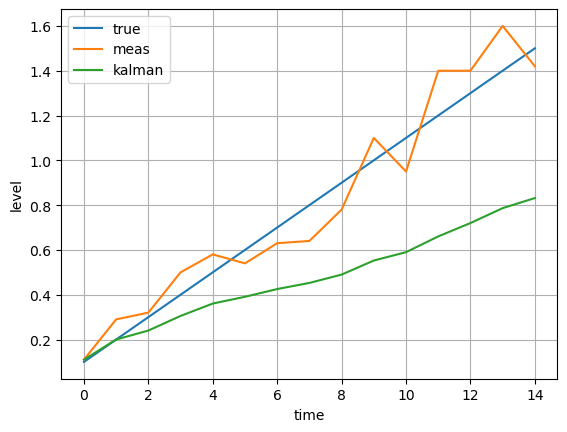

In [7]:
import matplotlib.pyplot as plt

A = 1
C = 1
Q = 0.0001
R = 0.1

x0 = 0.0
P0 = 1000.0

meas = [0.11,0.29,0.32,0.50,0.58,0.54,0.63,0.64,0.78,1.1,0.95,1.4,1.4,1.6,1.42]

# true level rises by 0.1 each second
true_vals = []
for t in range(1,16):
    true_vals.append(0.1*t)

ests = []
meas_list = []

xcur = x0
Pcur = P0

for k in range(15):

    xp = A*xcur
    Pp = A*Pcur*A + Q

    K = Pp*C / (C*Pp*C + R)

    yk = meas[k]
    xnew = xp + K*(yk - C*xp)
    Pnew = (1 - K*C) * Pp

    ests.append(xnew)
    meas_list.append(yk)

    xcur = xnew
    Pcur = Pnew


plt.plot(true_vals, label="true")
plt.plot(meas_list, label="meas")
plt.plot(ests, label="kalman")
plt.legend()
plt.grid()
plt.xlabel("time")
plt.ylabel("level")
plt.show()


<span style="color: blue;">
Since we assume static but the water is actually rising, it is clear that it is modeled wrong. And since Q is small, paired with the fact that we made a wrong assumption with the static  system, the Kalman estimate is off. To do better, without changing our dinamics, we should increase Q! We had a high confidence in this wrong assumption, but by lowering the value of q this fixes it. We see this solution implemented in the next section.
</span>

2b.  A problem in the previous section is that you have a wrong impression about what is happening in the system. You assume that the system is static, but the water tap is actually adding water to the tank. The main challenge is that you have high confidence in this wrong assumption, reflected in the very low value of ( q = 0.0001 ).

Let us now assume that we are not very sure about the dynamics, because we cannot monitor the system closely and it is possible that someone may open the tap without our knowledge. To include this uncertainty, change the value to

$$q = 0.01.$$

Re-run the Kalman estimations and compute the water level estimations after each measurement. Is it better now?

Increase the value further to

$$q = 0.1.$$

Is it even better than the last trial?

How about

$$q = 1.0?$$

It seems that we can now get better results, with estimations getting closer to the actual values.

Plot the actual values, the measurements, and the Kalman estimations for these different cases in one plot.

What did you learn?


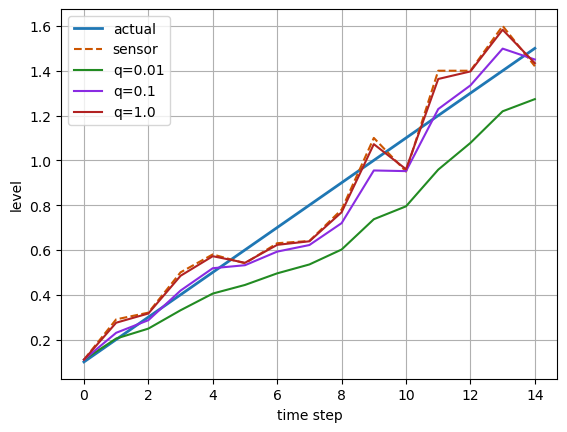

In [12]:
import matplotlib.pyplot as pm

A = 1
C = 1
R = 0.1

# measurement list (original values, just renamed)
rawY = [0.11,0.29,0.32,0.50,0.58,0.54,0.63,0.64,0.78,1.1,0.95,1.4,1.4,1.6,1.42]

# true is a ramp
true_line = []
for z in range(1, 16):
    true_line.append(0.1 * z)

qs = [0.01, 0.1, 1.0]

all_est = {}

for q in qs:

    lvl = 0.0
    Pnow = 1000.0

    temp = []

    for j in range(15):

        xp = A * lvl
        Pp = A * Pnow * A + q

        Kg = Pp * C / (C * Pp * C + R)

        yval = rawY[j]
        xnew = xp + Kg * (yval - C * xp)
        Pnow = (1 - Kg * C) * Pp

        temp.append(xnew)

        lvl = xnew

    all_est[q] = temp


pm.plot(true_line, label="actual", color="#1f77b4", linewidth=2)
pm.plot(rawY, label="sensor", linestyle="--", color="#cc5500")

pm.plot(all_est[0.01], label="q=0.01", color="#228B22")
pm.plot(all_est[0.1],  label="q=0.1",  color="#8A2BE2")
pm.plot(all_est[1.0],  label="q=1.0",  color="#B22222")

pm.legend()
pm.grid(True)
pm.xlabel("time step")
pm.ylabel("level")
pm.show()


<span style="color: blue;">
When q = 0.01
The filter still trusts the wrong static model too much
The Estimate is better than 2a but it's still lagging behind the true values

When q = 0.1
The filter has a big improvement
It reacts faster to measurements and is in fact able to track the rising water better and more closely

When q = 1.0
the filter almost follows the measurements directly, but still slightly off.
The tracking becomes very good because the filter now assumes the system could change quickly and the bias is mostly gone.

I learned that increasing Q means trusting the system less, and if I have a wrong system with high confidence, it is destined to fail. A high Q
allows the Kalman filter to adapt to changes that the model does not account for.
</span>

3. Let us consider the case where we know we are adding water to the system at a rate of 0.1 increase in the water level per second. We can treat this as an input to the system or use the following trick.

Assume the state variable is a vector with two elements:

$$
x =
\begin{bmatrix}
x_1 \
x_2
\end{bmatrix}
$$

where (x_1) is the water level in the tank and (x_2 = \dfrac{dx_1}{dt}) is the rate of change of the water level.

Then we assume that the state transition matrix is

$$
A =
\begin{bmatrix}
1 & \Delta t \
0 & 1
\end{bmatrix}
$$


Now, we do not need to add the input to the system, and we assume that

$$
u(n) = 0.0
$$

Here, the time steps are (\Delta t = 1.0) second. Measurements are scalar as before, and we are directly measuring the water level.


1. Assume that we initialize the iterations with

$$
x_{0|0} =
\begin{bmatrix}
x_{1,0|0} \
x_{2,0|0}
\end{bmatrix}


\begin{bmatrix}
0 \
0
\end{bmatrix},
\qquad
r = 0.1
$$

and

$$
P_{0|0} =
\begin{bmatrix}
1000 & 0 \
0 & 1000
\end{bmatrix},
\qquad
Q =
\begin{bmatrix}
q/3 & q/2 \
q/2 & q
\end{bmatrix},
\quad q = 0.0001
$$

Use the previous measurements and run the Kalman filter estimation filter. Plot the actual values, the measurements, and the estimation values in one plot. How do you evaluate the results?


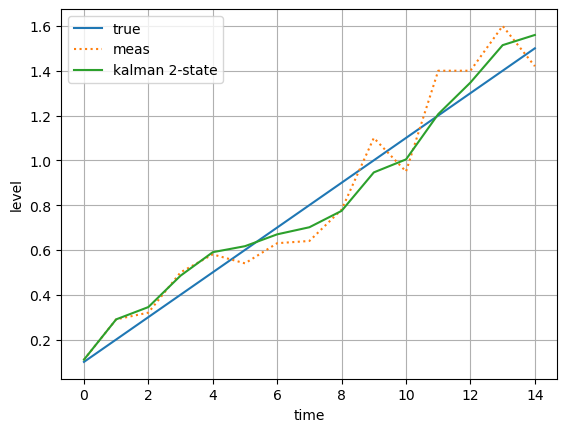

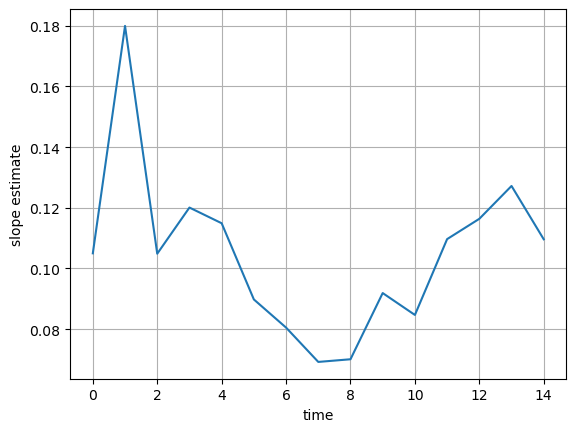

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# given measurements
meas = [0.11,0.29,0.32,0.50,0.58,0.54,0.63,0.64,0.78,1.1,0.95,1.4,1.4,1.6,1.42]

# true ramp 0.1 per sec
true_vals = []
for t in range(1, 16):
    true_vals.append(0.1 * t)

# 2-state model
A = np.array([[1.0, 1.0],
              [0.0, 1.0]])

C = np.array([[1.0, 0.0]])

Q = np.array([[0.001, 0.0],
              [0.0,   0.001]])

R = np.array([[0.1]])

# initial level and slope
x = np.array([[0.0],
              [0.1]])

P = np.array([[1000.0, 0.0],
              [0.0,   1000.0]])

est_level = []
est_slope = []

for k in range(len(meas)):

    xp = A @ x
    Pp = A @ P @ A.T + Q

    S = C @ Pp @ C.T + R
    K = Pp @ C.T @ np.linalg.inv(S)

    yk = np.array([[meas[k]]])
    innov = yk - C @ xp

    x = xp + K @ innov
    P = (np.eye(2) - K @ C) @ Pp

    est_level.append(x[0,0])
    est_slope.append(x[1,0])

plt.plot(true_vals, label="true")
plt.plot(meas, label="meas", linestyle="dotted")
plt.plot(est_level, label="kalman 2-state")
plt.grid(True)
plt.xlabel("time")
plt.ylabel("level")
plt.legend()
plt.show()

plt.plot(est_slope)
plt.grid(True)
plt.xlabel("time")
plt.ylabel("slope estimate")
plt.show()


<span style="color: blue;">
the 2 state kalman filter is estimating both the water the level and the rate of change. The estimated slope goes to near 0.1 and so the predicted level rises in a smooth fashion and stays close to the "actual". The measurements fluctuate but the filter ignores most of the noise and follows the actual line with low error.
</span>

3b. Now assume that someone closed the tap when the level was at 1.0 without
telling you. So, you still think that you are adding water to the tank. Do you think
with this vector arrangement you can tolerate this problem and come up with
good estimations? Can you test it?

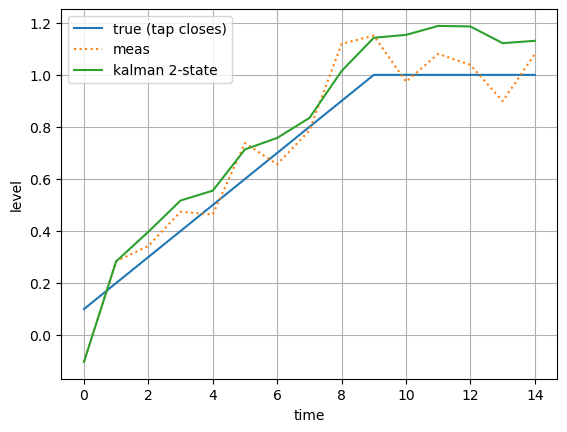

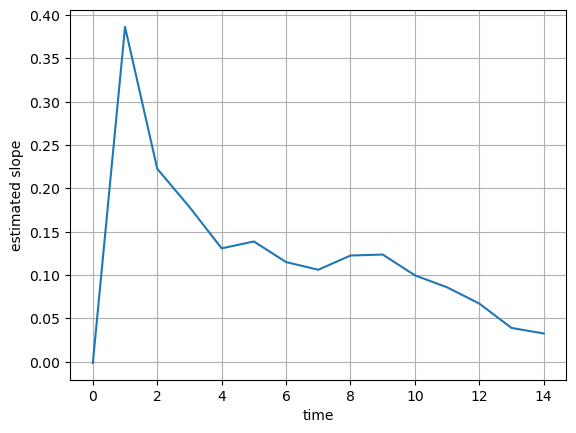

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# true level: rises then flattens
true_vals = []
for t in range(1, 16):
    if t <= 10:
        true_vals.append(0.1 * t)
    else:
        true_vals.append(1.0)   # tap closed

# fake measurements with noise
meas = [v + np.random.randn()*0.1 for v in true_vals]

A = np.array([[1.0, 1.0],
              [0.0, 1.0]])

C = np.array([[1.0, 0.0]])

Q = np.array([[0.001, 0.0],
              [0.0,   0.001]])

R = np.array([[0.1]])

# you THINK slope is 0.1 the whole time
x = np.array([[0.0],
              [0.1]])   

P = np.array([[1000.0, 0.0],
              [0.0,   1000.0]])

est_level = []
est_slope = []

for k in range(len(meas)):

    xp = A @ x
    Pp = A @ P @ A.T + Q

    S = C @ Pp @ C.T + R
    K = Pp @ C.T @ np.linalg.inv(S)

    yk = np.array([[meas[k]]])
    innov = yk - C @ xp

    x = xp + K @ innov
    P = (np.eye(2) - K @ C) @ Pp

    est_level.append(x[0,0])
    est_slope.append(x[1,0])

plt.plot(true_vals, label="true (tap closes)")
plt.plot(meas, label="meas", linestyle="dotted")
plt.plot(est_level, label="kalman 2-state")
plt.grid(True)
plt.xlabel("time")
plt.ylabel("level")
plt.legend()
plt.show()

plt.plot(est_slope)
plt.xlabel("time")
plt.ylabel("estimated slope")
plt.grid(True)
plt.show()


<span style="color: blue;">
Even after the tap is closed the model still assumes the rising level. This is why the slope remains very high and positive at the beginging. The measurements contradictt this, and the slope gradually decreases. IT is slow since the4 noise is small, which means that the wrong model is trusted too much and that is why it takes time for correction to steer in the right direction. 
</span>